# Exploring Supervised Machine Learning-Linear Regression

## Problem Statement:
In the regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a Simple linear Regression task as it just involves two variables.

What will be predicted score if a student study for 9.25hrs in a day?

## Importing  Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data

In [6]:
data=pd.read_csv("http://bit.ly/w-data")
print("Data loaded successfully")
data.head(10)

Data loaded successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
# Description of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
# Data shape
data.shape

(25, 2)

## Plotting the distribution of scores

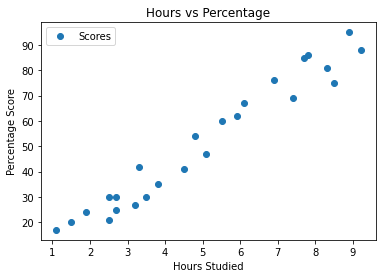

In [32]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


#### From this graph , we see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

In [46]:
X=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

## Spliting the data

In [47]:
# we split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training the model

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(X_train,y_train)

print("Training complete.")
print(lr.coef_)
print(lr.intercept_)

Training complete.
[9.91065648]
2.0181600414346974


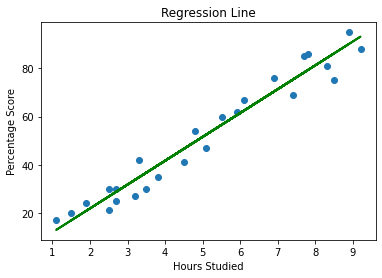

In [52]:
# Plotting the regression line
line=lr.coef_*X+lr.intercept_

plt.scatter(X, y)
plt.plot(X, line,color='green', linewidth=2);
plt.title("Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()


## Making Predictions

In [55]:
#displaying the test data(in Hours)
print(X_test)
y_predict=lr.predict(X_test)  # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


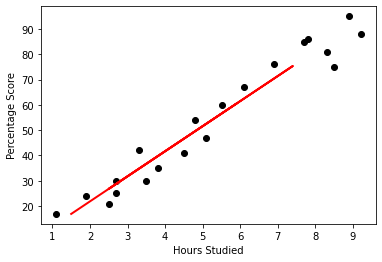

In [59]:
# To see what the model has learnt from the training set
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_test, y_predict, color='red', linewidth=2)
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

## Comparing Actual vs Predicted

In [61]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicting the score if a student studies for 9.25 hrs in a day

In [68]:
pred_score=lr.predict([[9.25]])
print("predicted score for student studying 9.25hrs is:", pred_score)

predicted score for student studying 9.25hrs is: [93.69173249]


## Evalution of Model

#### The final step is to evaluate the performance of algorithm. This step is used to compare how well different algorithms perform on a particular dataset. 

In [74]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_predict))
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score: {:.2f}".format(r2_score(y_test, y_predict)))

Mean Absolute Error: 4.183859899002975
Mean squared error: 21.60
r2_score: 0.95
